## TP3

Integrantes:
* Martín Fosco LU: 449/13
* Javier Minces LU: 231/13

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

### 1 - Creación del grafo
Para cada línea, nos quedamos con la columna de autores, con cada uno separado por &. Agregamos un nodo por autor, si no existía, y un eje para cada par de autores

In [7]:
db = pd.read_csv("data.csv", names = ["Años", "LetrasYNros", "Areas", "Autores", "Nombres"], error_bad_lines=False)
db


,Años,LetrasYNros,Areas,Autores,Nombres
0,1992,B368,Nucl.Phys.,Horne & Horowitz,Exact Black String Solutions in Three Dimens...
1,1992,B278,Phys. Lett.,Mikovic,Hamiltonian construction of W-gravity actions
2,1991,A6,Mod. Phys. Lett.,Huitu & Nemeschansky,Supersymmetric Gelfand-Dickey Algebra
3,1992,B373,Nucl.Phys.,Witten,Ground Ring Of Two Dimensional String Theory
4,1991,A6,Mod.Phys.Lett.,Intriligator,Fusion Residues
5,1991,A6,Mod. Phys. Lett.,Ooguri & Sasakura,Discrete and Continuum Approaches to Three-D...
6,1992,A7,Int. J. Mod. Phys.,LeCLair & Smirnov,Infinite Quantum Group Symmetry of Fields in...
7,1992,B372,Nucl.Phys.,Griffin,Solving 3+1 QCD on the Transverse Lattice Us...
8,1992,B274,Phys. Lett.,Sen,Twisted Black p-Brane Solutions in String Th...
9,1992,B372,Nucl.Phys.,Lerche & Smit & Warner,Differential Equations for Periods and Flat ...


nan
nan


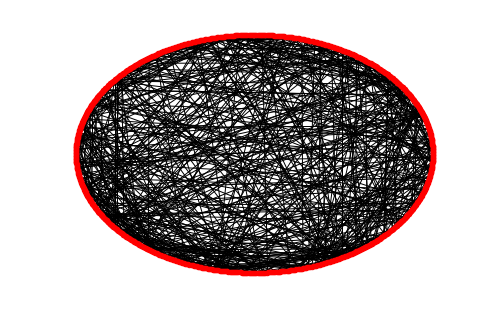

In [8]:
def authors_from(index):
    authors_str = db["Autores"][index]
    try: result = authors_str.split("&")
    except AttributeError:
        print (db["Autores"][index])
        return []
    filtered = []
    for i in range(len(result)):
        lower = result[i].strip().lower()
        filt = filter(str.isalnum, lower)
        if len(filt) >= 1 and len(filt) < 25:
            filtered.append(filt)
    return filtered
    

def get_all_authors():
    all_authors = []
    for index in range(db.shape[0]):
        all_authors += authors_from(index)
    return set(all_authors)

def edges_from(elems):
    for e1 in elems:
        for e2 in elems:
            yield e1, e2

def graph_of_collaborations():
    graph = nx.Graph()
    all_authors = get_all_authors()
    graph.add_nodes_from(all_authors)
    
    for index in range(db.shape[0]):
        authors = authors_from(index)
        if len(authors) > 1:
            permutations = edges_from(authors)
            graph.add_edges_from(permutations)
    
    return graph, all_authors 

graph, all_authors = graph_of_collaborations()
#for i in sorted(all_authors): print i
subgraph = graph.subgraph(list(all_authors)[1:1000])

nx.draw_circular(subgraph, node_size=20)
plt.show()

### 2 -  Distribución de grado
Networkx nos da el grado de cada nodo. Contamos cuántos nodos hay de cada uno. La distribución parece ser exponencial, ya que se ve lineal en el grafico semilog.

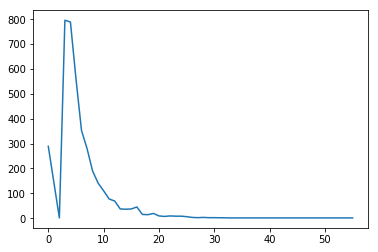

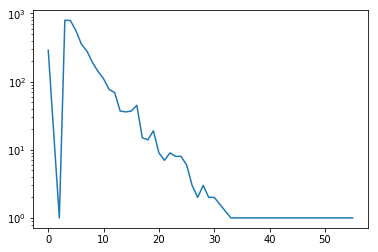

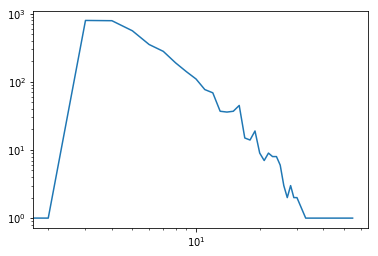

In [15]:
degree = (graph.degree(all_authors))
dict_degree = dict()
for tupla in degree:
    if tupla[1] in dict_degree:
        dict_degree[tupla[1]] += 1
    else:
        dict_degree[tupla[1]] = 1
        
plt.plot(list(dict_degree.keys()), list(dict_degree.values()))
plt.show()

plt.plot(list(dict_degree.keys()), list(dict_degree.values()))
plt.yscale("log")
plt.show()

plt.plot(list(dict_degree.keys()), list(dict_degree.values()))
plt.yscale("log")
plt.xscale("log")
plt.show()

### 3 - Componentes conexas

510
3005


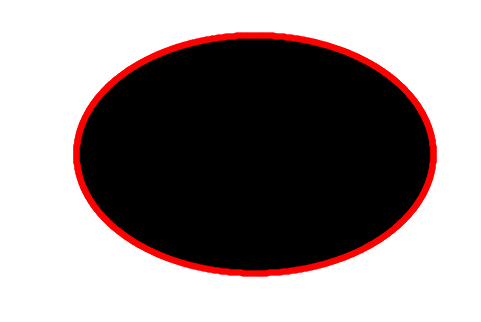

In [19]:
print (nx.number_connected_components(graph))
maxnodes = max([len(subgraph) for subgraph in (nx.connected_components(graph))])
print (maxnodes)

for subgraph in (nx.connected_components(graph)):
    if len(subgraph) == maxnodes:
        gigante = subgraph
        
nx.draw_circular(graph.subgraph(gigante), node_size=20)
plt.show()

### 4 - Tamaños de vecindades
Calculamos con un algoritmo nuestro y con el de la librería. 

In [20]:
def flatten(sets_list):
    if len(sets_list) == 0: return set([])
    return set(reduce(lambda x, y: set(x).union(y), sets_list))

#def k_nearest_neighbours(graph, node, k):
#    return k_nearest_neighbours(graph, node, k, set())
    
def k_nearest_neighbours(graph, node, k, already_added_neighbours):
    if k == 0: return []
    neighbours = set(graph.neighbors(node))
    not_explored_neighbours = neighbours - already_added_neighbours    
    
    #already_added_neighbours |= not_explored_neighbours
    
    neighbours_with_repetitions = \
        neighbours | \
        flatten(
           map(lambda node_i:
                k_nearest_neighbours(
                    graph,
                    node_i,
                    k-1,
                    already_added_neighbours | not_explored_neighbours
                ),
           list(not_explored_neighbours)
           )
        )
    return neighbours_with_repetitions - set([node])

In [21]:
def k_nearest_neighbours(graph, node, k):
    dict_path_length = nx.shortest_path_length(graph, nodo)
    return [node for node in dict_path_length if dict_path_length[node] <= k]

In [28]:
compGigante = graph.subgraph(gigante)
print len(gigante)

neighbours_by_degree = []
dif = []
mx = 0
for i in range(10):
    nodo = compGigante.nodes().items()[random.randint(0, len(gigante))][0]
    neighbours_by_degree.append([len(k_nearest_neighbours(compGigante, nodo, i)) for i in range(9)])
    dif.append([neighbours_by_degree[-1][i + 1] - neighbours_by_degree[-1][i] for i in range(8)])
    mx = max(mx, max(dif[-1]))
print mx

3005
1003


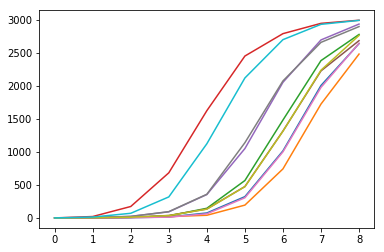

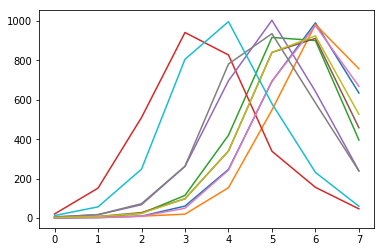

In [29]:
for y in neighbours_by_degree:
    plt.plot(range(len(y)), y)
plt.show()

for y in dif:
    plt.plot(range(len(y)), y)
plt.show()

### 5 - Mundos pequeños
A juzgar por la comparación de la componente gigante con el grafo aleatorio generado, la componente gigante es un caso de "mundo pequeño". Esto es porque 

In [31]:
print nx.average_clustering(compGigante)
rnd = nx.expected_degree_graph(dict_degree.values(), selfloops = False)

maxnodes = max([len(subgraph) for subgraph in (nx.connected_components(rnd))])

for subgraph in (nx.connected_components(rnd)):
    if len(subgraph) == maxnodes:
        giganternd = subgraph

print nx.average_clustering(rnd.subgraph(giganternd))

print nx.average_shortest_path_length(compGigante)
print nx.average_shortest_path_length(rnd.subgraph(giganternd))


0.483335436758
0.853272001467
6.11526572446
1.45652173913


### 6 - Estrellas

In [ ]:
dict_bet = nx.betweenness_centrality(compGigante)
print max(dict_bet.values())